Question b)

In [1]:
import numpy as np
from scipy import linalg
from scipy.linalg import lapack
import matplotlib.pyplot as plt

function to compute the C matrix

In [2]:
def final_C(N):
    
    d=np.array([[10],[0]])
    A=np.array([[1,1],[0,0.95]])
    B=np.array([[0],[0.1]])
    C=[A for i in range(N-1)]
    
    k=np.arange(N-2,-1,-1)
    for j in range(N-1):
        
        for i in range(k[j]):
            C[j]=np.dot(A,C[j])  
    
    

    C=[np.dot(C[i],B) for i in range(N-1)]
    C.append(B)
    
    new_C=np.zeros((2,N))
    
    for i in range(2):
        for j in range(N):
            new_C[i,j]=C[j][i]

    return new_C
    
    

In [3]:
final_C(29)

array([[1.52434623, 1.49931182, 1.47295981, 1.44522085, 1.41602195,
        1.38528626, 1.35293291, 1.31887675, 1.28302816, 1.24529279,
        1.20557136, 1.16375933, 1.11974666, 1.07341754, 1.02465004,
        0.97331583, 0.91927982, 0.86239982, 0.80252612, 0.73950118,
        0.67315914, 0.60332541, 0.52981622, 0.45243812, 0.3709875 ,
        0.28525   , 0.195     , 0.1       , 0.        ],
       [0.02378269, 0.02503441, 0.02635201, 0.02773896, 0.0291989 ,
        0.03073569, 0.03235335, 0.03405616, 0.03584859, 0.03773536,
        0.03972143, 0.04181203, 0.04401267, 0.04632912, 0.0487675 ,
        0.05133421, 0.05403601, 0.05688001, 0.05987369, 0.06302494,
        0.06634204, 0.06983373, 0.07350919, 0.07737809, 0.08145062,
        0.0857375 , 0.09025   , 0.095     , 0.1       ]])

Compute u vector with least squares function from scipy package.

Computing velocity and position

In [4]:
def new_u(N):
    I=np.identity(N)
    d=np.array([[10],[0]])
    u = lapack.dgglse(I, final_C(N), np.zeros(N), d)
    
    vel=np.zeros(N+1)
    position=np.zeros(N+1)
    for i in range(0,N):
        position[i+1]=position[i]+vel[i]
        vel[i+1]=0.95*vel[i]+0.1*u[3][i]
    
    return u[3],vel,position   

Plotting u,velocity and position

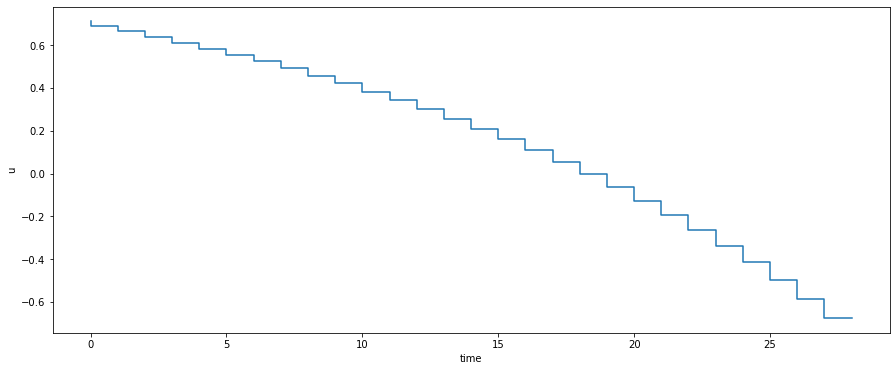

In [5]:
plt.figure(figsize = (15,6))
plt.step(range(29),new_u(29)[0])
plt.xlabel("time")
plt.ylabel("u")
plt.show()

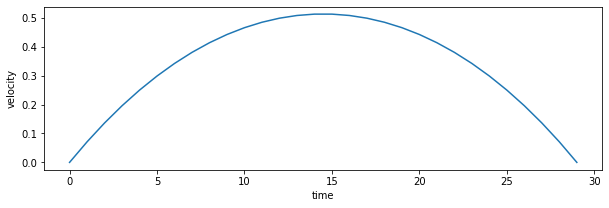

In [6]:
plt.figure(figsize = (10,3))
plt.plot(range(30),new_u(29)[1])
plt.xlabel("time")
plt.ylabel("velocity")
plt.show()

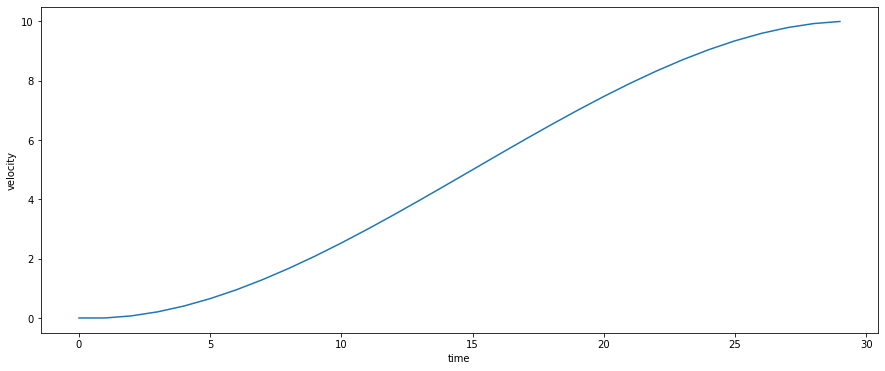

In [7]:
plt.figure(figsize = (15,6))
plt.plot(range(30),new_u(29)[2])
plt.xlabel("time")
plt.ylabel("velocity")
plt.show()

Question c)

In [49]:
print(new_u(2)[0])
print(new_u(3)[0])

[100. -95.]
[ 50.    2.5 -47.5]


finding energy for each step

In [55]:
all_sums=[]
summ=0
for N in range(2,30):
    summ=0
    total_new_u=new_u(N)[0]
    for j in range(len(total_new_u)):
        summ+=pow((total_new_u[j]),2)
    all_sums.append(summ)
all_sums=[np.log(x) for x in all_sums]    

Plotting energy:

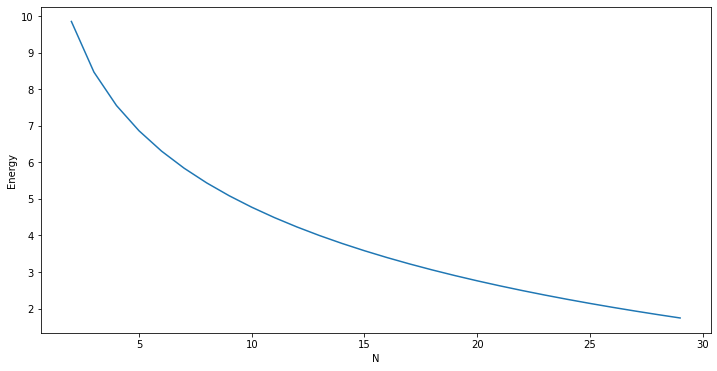

In [57]:
plt.figure(figsize=(12,6))
plt.plot(range(2,30),all_sums)
plt.xlabel("N")
plt.ylabel("Energy")
plt.show()

Question 4)

In [ ]:
#res = minimize(Εnergy,u, constraints=())